<center>
$$ \mathbf{\Huge \text{Human Activity Recognition}} $$
</center>


## Description of Dataset
Dataset link: https://www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset

The **Human Activity Recognition (HAR)** database is built from recordings of 30 subjects performing daily activities while carrying a smartphone with embedded inertial sensors.

- **Participants**: 30 volunteers aged between 19 and 48 years.
- **Activities**: The subjects performed six activities:
  - **WALKING**
  - **WALKING_UPSTAIRS**
  - **WALKING_DOWNSTAIRS**
  - **SITTING**
  - **STANDING**
  - **LAYING**

- **Equipment**: A Samsung Galaxy S II smartphone was used, worn on the waist, with an accelerometer and gyroscope. 
  - The sensors captured 3-axis linear acceleration and 3-axis angular velocity at a constant rate of 50Hz.
  
- **Data Labeling**: The experiments were video-recorded, and the data was manually labeled.





<!-- - **Data Split**: The dataset was randomly divided into two sets:
  - **70%** for training data
  - **30%** for testing data -->



In [1]:
from IPython.display import Video
# Provide the correct path to your video file
Video("Activity Recognition Experiment Using Smartphone Sensors._2.mp4", width=600, height=400)



## Library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
palette = sns.color_palette("colorblind", as_cmap=True)
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.metrics import accuracy_score, classification_report



In [89]:
data = pd.read_csv("train.csv")
data.sample(10)
col_info = pd.read_csv("column_info.csv")


In [39]:
data.shape

(7352, 563)

In [40]:
data.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

## Features Detail


The dataset contains **563 features**, derived from different sensor measurements related to human activity recognition. The features are computed from various sensor data types such as:

- **Body Acceleration**
- **Gravity Acceleration**
- **Body Gyroscope**

Each of these measurements is captured in different domains, including time, frequency, and angle, and further processed with the following statistical and signal processing techniques:

1. **Mean**: The average value of the signal.
2. **Standard Deviation (SD)**: Measures the spread of the data from the mean.
3. **Median Absolute Deviation (MAD)**: A robust measure of the variability of the data.
4. **Maximum**: The highest value observed in the data.
5. **Minimum**: The lowest value observed in the data.
6. **SMA (Simple Moving Average)**: A smoothing technique that calculates the average of a signal over a window of time, used to reduce noise and highlight trends.
7. **Energy**: The sum of the squared signal values, representing the signal's power.
8. **Interquartile Range (IQR)**: The range between the 25th and 75th percentiles of the data, representing the spread of the middle 50%.
9. **Entropy**: A measure of randomness or disorder in the signal.
10. **Autoregression Coefficient**: A statistical method used for modeling time series data.

Each of these features is computed for the components of the sensor data in the **x**, **y**, and **z** axes, resulting in a total of **563 features**. The combination of these features helps to classify different human activities (e.g., walking, sitting, etc.) based on sensor measurements.




- **No Missing Values**: There are no missing values in the dataset, ensuring that all records are complete.
- **No Duplicate Values**: There are no duplicate rows, which helps maintain the integrity and uniqueness of each observation.
- **All Columns are Numerical**: All features in the dataset are numerical, making them suitable for various statistical and machine learning analyses.


# Dimensionality Reduction

## PCA

In [41]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, :-2])

In [42]:
# Fit PCA to get all components
pca = PCA()
pca.fit(data_scaled)

# Explained variance ratio for each component
explained_variance = pca.explained_variance_ratio_

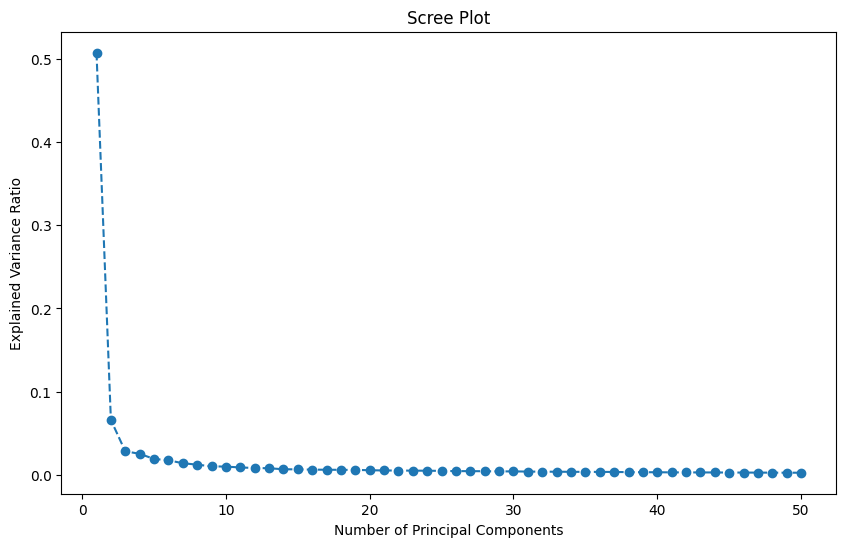

In [43]:
import matplotlib.pyplot as plt

# Assuming 'pca' is the PCA model that has already been fitted
explained_variance = pca.explained_variance_ratio_

# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), explained_variance[:50], marker='o', linestyle='--')  # Adjust range to 50 principal components
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()


In [44]:
# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
# Find the number of components needed for 90% variance
num_components = next(i for i, total in enumerate(cumulative_variance) if total >= 0.80) + 1
num_components2 = next(i for i, total in enumerate(cumulative_variance) if total >= 0.90) + 1

# print(f"Number of components needed to retain 80% variance: {num_components}")
# Assuming 'num_components' is already calculated
print(f"\n{'-'*50}")
print(f"{'Number of Components Required to Retain 80% Variance':^50}")
print(f"{'-'*50}")
print(f"\nTo retain 80% of the variance in the dataset, we need {num_components} principal components.\n")

print(f"\n{'-'*50}")
print(f"{'Number of Components Required to Retain 90% Variance':^50}")
print(f"{'-'*50}")
print(f"\nTo retain 90% of the variance in the dataset, we need {num_components2} principal components.\n")


--------------------------------------------------
Number of Components Required to Retain 80% Variance
--------------------------------------------------

To retain 80% of the variance in the dataset, we need 26 principal components.


--------------------------------------------------
Number of Components Required to Retain 90% Variance
--------------------------------------------------

To retain 90% of the variance in the dataset, we need 63 principal components.



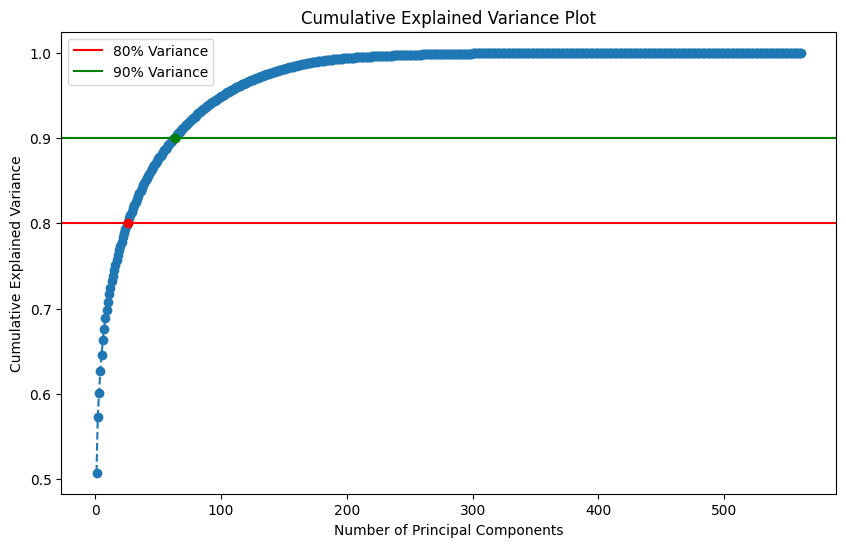

In [45]:
import matplotlib.pyplot as plt

# Assuming cumulative_variance is already calculated
plt.figure(figsize=(10, 6))

# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')

# Add horizontal line at 80% and 90% variance
plt.axhline(y=0.80, color='r', linestyle='-', label='80% Variance')
plt.axhline(y=0.90, color='g', linestyle='-', label='90% Variance')

# Mark the x-axis positions where 80% and 90% variance is reached
plt.scatter([next(i for i, val in enumerate(cumulative_variance) if val >= 0.80) + 1], [0.80], color='r', zorder=5)
plt.scatter([next(i for i, val in enumerate(cumulative_variance) if val >= 0.90) + 1], [0.90], color='g', zorder=5)

# Add labels and title
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Plot')

# Display legend
plt.legend()

# Show the plot
plt.show()


In [90]:
def PCA_Analysis( n , data , col_info):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.iloc[:, :-2])
    
    # Fit PCA with at least 5 components
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(data_scaled)

    column_name = [f'PC{i+1}' for i in range(n)]
    
    # dataframe of principal components
    principal_df = pd.DataFrame(data=principal_components, columns=column_name)

    # Dataframe of eigenvectors as a column 
    loadings = pd.DataFrame(pca.components_[:n], columns=data.columns[:-2], index= column_name)
    loadings = loadings.T
    
    # Eigenvalues (amount of variance explained by each principal component)
    eigenvalues = pca.explained_variance_

    # Correlation Dataframe with columns
    corr = dict()
    for j in  range(n):
        corr[f'PC_corr{j+1}'] = np.sqrt(eigenvalues[j])*loadings.T.values[j]
    
    correlation_df = pd.DataFrame(corr)
    return correlation_df

    # creating a DataFrame having index for variables |correlated| > 0.9
    for k in  range(n):
        
        correlation = correlation_df.iloc[:,k]
        # Get indexes of elements greater than 0.9
        indexes = [index for index, value in enumerate(correlation) if abs(value) > 0.9]

        PC = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')
        print(PC)
        PC.to_csv(f'PC_{k} info')

        # for name in PC.columns[1:]:
        #     # Plot the bar chart
        #     plt.figure(figsize=(10, 6))
        #     PC[name].value_counts().plot(kind='bar', color='skyblue')
        #     plt.title(f'Bar Plot of {name}')
        #     plt.xlabel(f'{name}')
        #     plt.ylabel('Frequency')
        #     plt.show()


#### PC1 are related to follwoing columnns

In [94]:
data.columns[[index for index, value in enumerate(PCs.iloc[:,1]) if abs(value) > 0.65]]

Index(['tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-arCoeff()-Z,3', 'tGravityAcc-arCoeff()-Z,4',
       'tBodyAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()1',
       'tBodyGyroMag-arCoeff()1', 'tBodyGyroMag-arCoeff()2',
       'fBodyAcc-meanFreq()-Z', 'fBodyAccMag-meanFreq()'],
      dtype='object')

In [96]:
# Create a DataFrame with component loadings (eigenvectors)
# Rows represent principal components, and columns represent features
loadings = pd.DataFrame(pca.components_[:5], columns=data.columns[:-2], index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
loadings = loadings.T
loadings

,PC1,PC2,PC3,PC4,PC5
tBodyAcc-mean()-X,0.000028,0.015638,0.032482,-0.013609,-0.003114
tBodyAcc-mean()-Y,-0.002473,-0.000080,-0.002695,-0.001147,-0.012960
tBodyAcc-mean()-Z,-0.001527,-0.004052,-0.010167,0.008681,-0.005127
tBodyAcc-std()-X,0.056213,-0.011165,0.027241,0.048379,-0.006130
tBodyAcc-std()-Y,0.056788,-0.025959,0.023044,0.014119,0.015845
...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.001014,0.012141,0.004326,0.012749,-0.018253
"angle(tBodyGyroJerkMean,gravityMean)",-0.001582,-0.008723,-0.004641,-0.004192,0.010679
"angle(X,gravityMean)",-0.023100,0.017476,-0.107508,0.118799,0.167569
"angle(Y,gravityMean)",0.029719,-0.035213,0.080053,-0.102789,-0.131835


In [97]:
# Eigenvalues (amount of variance explained by each principal component)
eigenvalues = pca.explained_variance_

# Display eigenvalues for each principal component
print("Eigenvalues for each principal component:")
for i, eigenvalue in enumerate(eigenvalues, 1):
    print(f"PC{i}: {eigenvalue}")

Eigenvalues for each principal component:
PC1: 284.9211307884457
PC2: 36.92263841847647
PC3: 15.746252070722045
PC4: 14.049085822383585
PC5: 10.594719999082434
PC6: 9.672991689768715
PC7: 7.692420641878765
PC8: 6.727740872599223
PC9: 5.587531858026385
PC10: 5.414872288752582
PC11: 4.825546109072785
PC12: 4.4901868721032825
PC13: 4.286602680423888
PC14: 3.6207877536262196
PC15: 3.5478221491356416
PC16: 3.3648986120101343
PC17: 3.292116979597083
PC18: 3.2284745979257137
PC19: 3.186470489116453
PC20: 2.958531731093605
PC21: 2.8074178659861926
PC22: 2.7403438927197667
PC23: 2.683099396610619
PC24: 2.628995626281467
PC25: 2.520855629872672
PC26: 2.3622841438467144


In [98]:
e_value = 284.9211307884459

In [99]:
correlation = []
for i in range(561):
    correlation.append(loadings.iloc[i, 0] * np.sqrt(e_value))

In [100]:
# Get indexes of elements greater than 0.9
indexes = [index for index, value in enumerate(correlation) if abs(value) > 0.9]

# Display the result
len(indexes)

174

In [101]:
col = pd.DataFrame(data.columns[indexes] , columns = ['Names'])

In [102]:
col

,Names
0,tBodyAcc-std()-X
1,tBodyAcc-std()-Y
2,tBodyAcc-std()-Z
3,tBodyAcc-mad()-X
4,tBodyAcc-mad()-Y
...,...
169,fBodyBodyGyroJerkMag-std()
170,fBodyBodyGyroJerkMag-mad()
171,fBodyBodyGyroJerkMag-sma()
172,fBodyBodyGyroJerkMag-iqr()


In [103]:
PC1 = pd.merge(col , col_info , how= 'inner')

In [104]:
PC1.drop(columns = 'Unnamed: 0' , inplace= True)

In [105]:
PC1

,Names,Domain,Measure,Statistic,Device,Angle,Magnitude,Direction
0,tBodyAcc-std()-X,Time,Body Acceleration,Standard Deviation,Accelerometer,No,No,X
1,tBodyAcc-std()-Y,Time,Body Acceleration,Standard Deviation,Accelerometer,No,No,Y
2,tBodyAcc-std()-Z,Time,Body Acceleration,Standard Deviation,Accelerometer,No,No,Z
3,tBodyAcc-mad()-X,Time,Body Acceleration,Median Absolute Deviation,Accelerometer,No,No,X
4,tBodyAcc-mad()-Y,Time,Body Acceleration,Median Absolute Deviation,Accelerometer,No,No,Y
...,...,...,...,...,...,...,...,...
169,fBodyBodyGyroJerkMag-std(),Frequency,Body Gyroscope,Standard Deviation,Gyroscope,No,Yes,NaN
170,fBodyBodyGyroJerkMag-mad(),Frequency,Body Gyroscope,Median Absolute Deviation,Gyroscope,No,Yes,NaN
171,fBodyBodyGyroJerkMag-sma(),Frequency,Body Gyroscope,sma,Gyroscope,No,Yes,NaN
172,fBodyBodyGyroJerkMag-iqr(),Frequency,Body Gyroscope,Inter Quartile Range,Gyroscope,No,Yes,NaN


In [150]:
# Fit PCA with 26 components
pca = PCA(n_components=26)
principal_components = pca.fit_transform(data_scaled)

# Convert the principal components to a DataFrame with 26 columns
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(26)])




In [148]:
# Create a DataFrame with component loadings (eigenvectors) for the top 10 principal components
loadings = pd.DataFrame(pca.components_[:10], columns=data.columns[:-2], index=[f'PC{i+1}' for i in range(10)])

# Transpose the DataFrame so that rows represent features and columns represent principal components
loadings = loadings.T

# Display the component loadings
loadings


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
tBodyAcc-mean()-X,0.000028,0.015638,0.032482,-0.013609,-0.003114,0.003868,-0.064800,0.053125,0.085606,0.036854
tBodyAcc-mean()-Y,-0.002473,-0.000080,-0.002695,-0.001147,-0.012960,0.014592,0.009150,-0.009919,0.008756,-0.002415
tBodyAcc-mean()-Z,-0.001527,-0.004052,-0.010167,0.008681,-0.005127,0.012575,0.048954,-0.019371,-0.023414,-0.029216
tBodyAcc-std()-X,0.056213,-0.011165,0.027241,0.048379,-0.006130,-0.025094,0.029074,0.037399,0.002948,0.044796
tBodyAcc-std()-Y,0.056788,-0.025959,0.023044,0.014119,0.015845,-0.020958,0.001115,-0.035880,-0.014615,-0.009128
...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.001014,0.012141,0.004326,0.012749,-0.018253,0.031078,-0.010822,0.019595,0.009515,0.045509
"angle(tBodyGyroJerkMean,gravityMean)",-0.001582,-0.008723,-0.004641,-0.004192,0.010679,-0.011357,-0.001605,-0.002471,-0.002754,-0.013326
"angle(X,gravityMean)",-0.023100,0.017476,-0.107508,0.118799,0.167569,0.016097,-0.025043,0.041362,-0.008863,-0.039887
"angle(Y,gravityMean)",0.029719,-0.035213,0.080053,-0.102789,-0.131835,-0.035573,0.001644,-0.052492,0.034777,0.045424


In [ ]:
def PCA_Analysis( n , data , col_info):
    # Standardize the data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data.iloc[:, :-2])
    
    # Fit PCA with at least 5 components
    pca = PCA(n_components=n)
    principal_components = pca.fit_transform(data_scaled)

    column_name = [f'PC{i+1}' for i in range(n)]
    
    # dataframe of principal components
    principal_df = pd.DataFrame(data=principal_components, columns=column_name)

    # Dataframe of eigenvectors as a column 
    loadings = pd.DataFrame(pca.components_[:n], columns=data.columns[:-2], index= column_name)
    loadings = loadings.T
    
    # Eigenvalues (amount of variance explained by each principal component)
    eigenvalues = pca.explained_variance_

    # Correlation Dataframe with columns
    corr = dict()
    for j in  range(n):
        corr[f'PC_corr{j+1}'] = np.sqrt(eigenvalues[j])*loadings.T.values[j]
    
    correlation_df = pd.DataFrame(corr)
    return correlation_df

    # creating a DataFrame having index for variables |correlated| > 0.9
    for k in  range(n):
        
        correlation = correlation_df.iloc[:,k]
        # Get indexes of elements greater than 0.9
        indexes = [index for index, value in enumerate(correlation) if abs(value) > 0.9]

        PC = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')
        print(PC)
        PC.to_csv(f'PC_{k} info')

In [ ]:

# Create a long-form DataFrame with 'PC1' and 'Activity'
long_df = pd.DataFrame({
    'PC1': principal_df.iloc[:, 0],
    'Activity': principal_df['Activity']
})


plt.figure(figsize=(10, 6))
sns.histplot(long_df, x='PC1', hue='Activity', bins=30, palette='viridis', element='poly')

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Histogram of PC1 with Activity Hue')

# Explicitly set legend labels
plt.legend(title='Activity', labels=long_df['Activity'].unique())

plt.show()

### Correlation of PC-1 with variables

In [50]:
correlation = []
for i in range(561):
    correlation.append(loadings.iloc[i, 0] * np.sqrt(e_value))

In [51]:
# Get indexes of elements greater than 0.9
indexes = [index for index, value in enumerate(correlation) if abs(value) > 0.95]

# Display the result
len(indexes)

67

#### PC1 are related to follwoing columnns

In [52]:
data.columns[indexes]

Index(['tBodyAcc-std()-Y', 'tBodyAcc-min()-X', 'tBodyAcc-sma()',
       'tBodyAccJerk-std()-X', 'tBodyAccJerk-std()-Y', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-mad()-X', 'tBodyAccJerk-mad()-Y', 'tBodyAccJerk-mad()-Z',
       'tBodyAccJerk-sma()', 'tBodyAccJerk-iqr()-X', 'tBodyGyro-sma()',
       'tBodyGyroJerk-std()-Z', 'tBodyGyroJerk-mad()-Z', 'tBodyGyroJerk-sma()',
       'tBodyGyroJerk-iqr()-Z', 'tBodyAccMag-mean()', 'tBodyAccMag-std()',
       'tBodyAccMag-max()', 'tBodyAccMag-sma()', 'tGravityAccMag-mean()',
       'tGravityAccMag-std()', 'tGravityAccMag-max()', 'tGravityAccMag-sma()',
       'tBodyAccJerkMag-mean()', 'tBodyAccJerkMag-std()',
       'tBodyAccJerkMag-mad()', 'tBodyAccJerkMag-max()',
       'tBodyAccJerkMag-sma()', 'tBodyAccJerkMag-iqr()', 'tBodyGyroMag-mean()',
       'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-mean()',
       'tBodyGyroJerkMag-sma()', 'fBodyAcc-mean()-X', 'fBodyAcc-mean()-Y',
       'fBodyAcc-mean()-Z', 'fBodyAcc-mad()-X', 'fBodyAcc-mad()-Y',
   

## Visualizing principal Component 1

In [53]:
principal_df['Activity']=data['Activity']

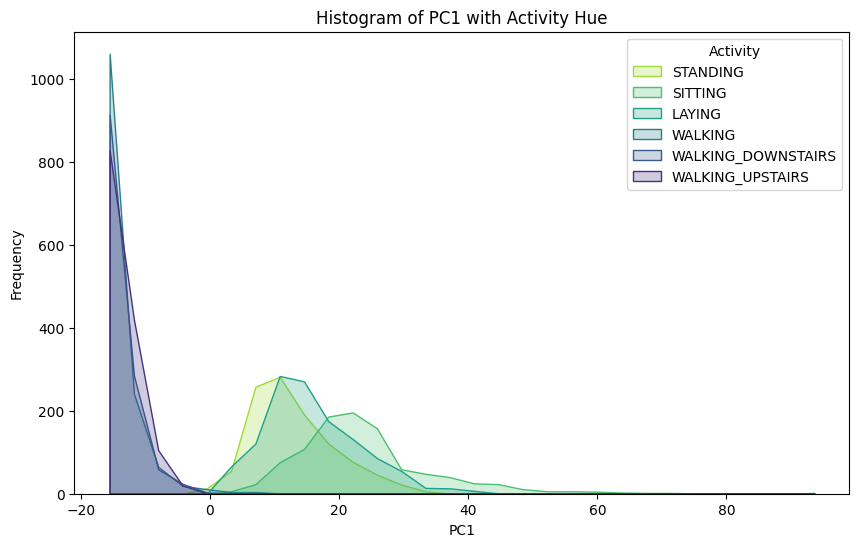

In [54]:
# Create a long-form DataFrame with 'PC1' and 'Activity'
long_df = pd.DataFrame({
    'PC1': principal_df.iloc[:, 0],
    'Activity': principal_df['Activity']
})


plt.figure(figsize=(10, 6))
sns.histplot(long_df, x='PC1', hue='Activity', bins=30, palette='viridis', element='poly')

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('Frequency')
plt.title('Histogram of PC1 with Activity Hue')

# Explicitly set legend labels
plt.legend(title='Activity', labels=long_df['Activity'].unique())

plt.show()

### **Principal Component Analysis (PCA) Interpretation:**

From the histogram of the first principal component (PC1), we can observe a clear separation between motion and non-motion activities. The motion activities, such as:

- *WALKING*,
- *WALKING UPSTAIRS*, 
- *WALKING DOWNSTAIRS*,

are distinctly separated from the non-motion activities, which include:

- *STANDING*,
- *LAYING*, 
- *SITTING*.

This suggests that PC1 captures a significant amount of variance in the data related to the movement or lack thereof. The clear separation in the histogram implies that the first principal component is highly effective in distinguishing between activities that involve motion (walking) and those that do not (standing, sitting, laying).

Thus, PC1 is a crucial component for classifying these activities.


In [111]:
col_info['Measure'].value_counts(normalize=True)

Measure
Body Acceleration       0.523297
Body Gyroscope          0.381720
Gravity Acceleration    0.094982
Name: proportion, dtype: float64

In [112]:
PC1['Measure'].value_counts(normalize=True)

Measure
Body Acceleration       0.603448
Body Gyroscope          0.356322
Gravity Acceleration    0.040230
Name: proportion, dtype: float64

<Axes: xlabel='Statistic'>

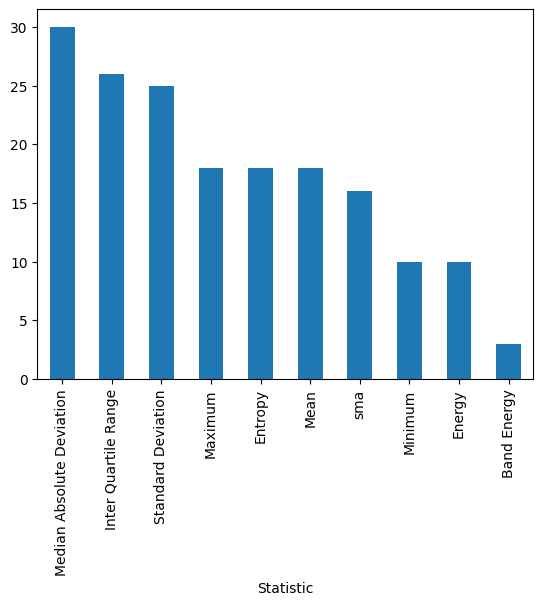

In [113]:
PC1['Statistic'].value_counts().plot(kind='bar')

<Axes: xlabel='Measure'>

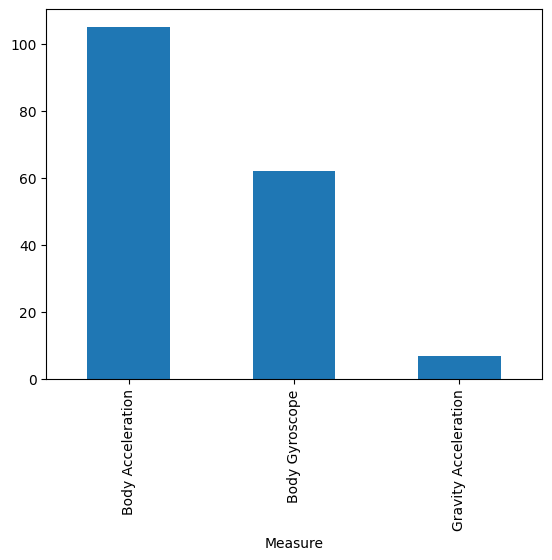

In [114]:
PC1['Measure'].value_counts().plot(kind='bar')

## Visualizing principal Component 2

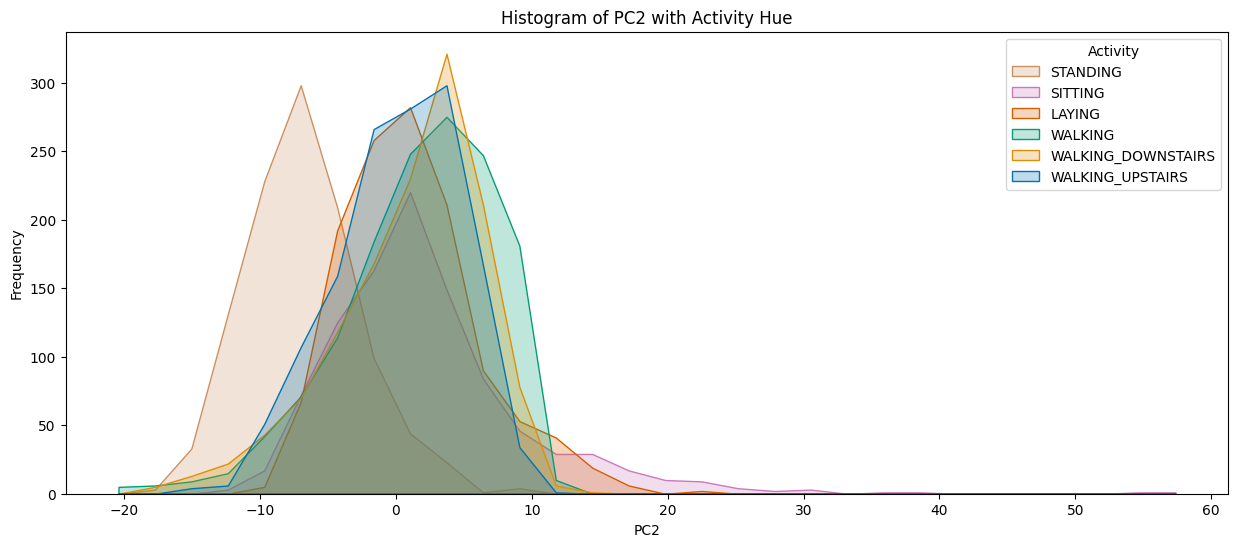

In [117]:

# Set up the figure for a single plot
plt.figure(figsize=(15, 6))

# Create histogram for PC6 with Activity as hue
sns.histplot(data=principal_df, x='PC2', hue='Activity', bins=30, palette='colorblind', element='poly')

# Add labels and title
plt.xlabel('PC2')
plt.ylabel('Frequency')
plt.title('Histogram of PC2 with Activity Hue')

# Explicitly set legend labels
plt.legend(title='Activity', labels=principal_df['Activity'].unique())

# Show the plot
plt.show()


## Principal Component (2): Separation of Activities

The principal components show that the **standing** activity is almost completely separated from other activities. This means **Principal Component 2 (PC2)** captures information that helps to distinguish between non-motion activities (like standing) and remaining activities (such as walking or climbing stairs).



In [178]:
PCs = PCA_Analysis(10 , data , col_info)

In [189]:
# Get indexes of elements greater than 0.9
indexes = [index for index, value in enumerate(PCs['PC_corr2']) if abs(value) > 0.7]

# Display the result
len(indexes)
PC2 = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')

In [190]:
col_info['Measure'].value_counts(normalize=True)

Measure
Body Acceleration       0.523297
Body Gyroscope          0.381720
Gravity Acceleration    0.094982
Name: proportion, dtype: float64

In [191]:
PC2['Measure'].value_counts(normalize=True)

Measure
Gravity Acceleration    0.500
Body Acceleration       0.375
Body Gyroscope          0.125
Name: proportion, dtype: float64

<Axes: xlabel='Statistic'>

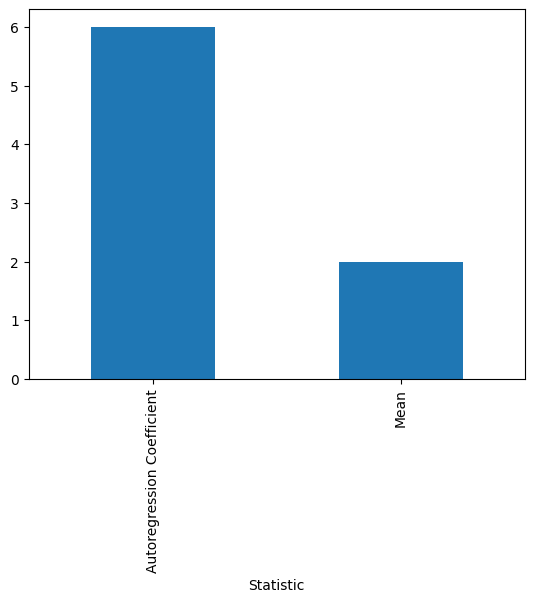

In [192]:
PC2['Statistic'].value_counts().plot(kind='bar')

<Axes: xlabel='Measure'>

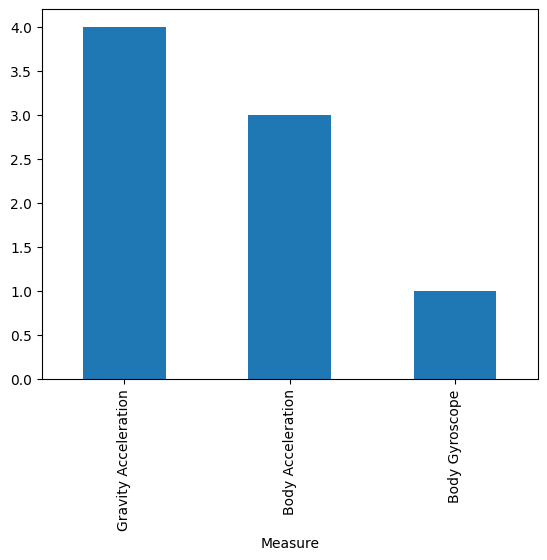

In [193]:
PC2['Measure'].value_counts().plot(kind='bar')

##  PC4 Component analysis

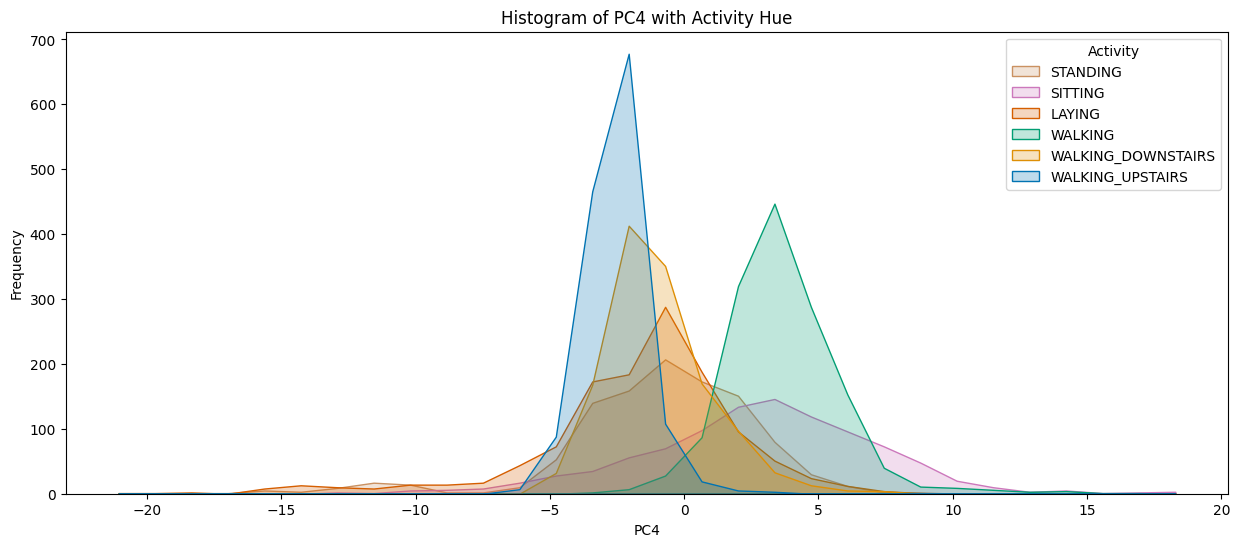

In [60]:

# Set up the figure for a single plot
plt.figure(figsize=(15, 6))

# Create histogram for PC6 with Activity as hue
sns.histplot(data=principal_df, x='PC4', hue='Activity', bins=30, palette='colorblind', element='poly')

# Add labels and title
plt.xlabel('PC4')
plt.ylabel('Frequency')
plt.title('Histogram of PC4 with Activity Hue')

# Explicitly set legend labels
plt.legend(title='Activity', labels=principal_df['Activity'].unique())

# Show the plot
plt.show()


## Principal Component Analysis: Motion Patterns for Walking and Walking Upstairs

The above analysis of the principal component (PC4) shows that it can approximately distinguish between different types of motion. Specifically, **normal walking** with extra differentiaition of  **walking upstairs** display distinct patterns in this component, meaning they can be identified separately from other activities.

This result suggests that PC4 captures unique motion characteristics for these activities, which helps in recognizing different types of movement based on sensor data.


## Top 10 principal components

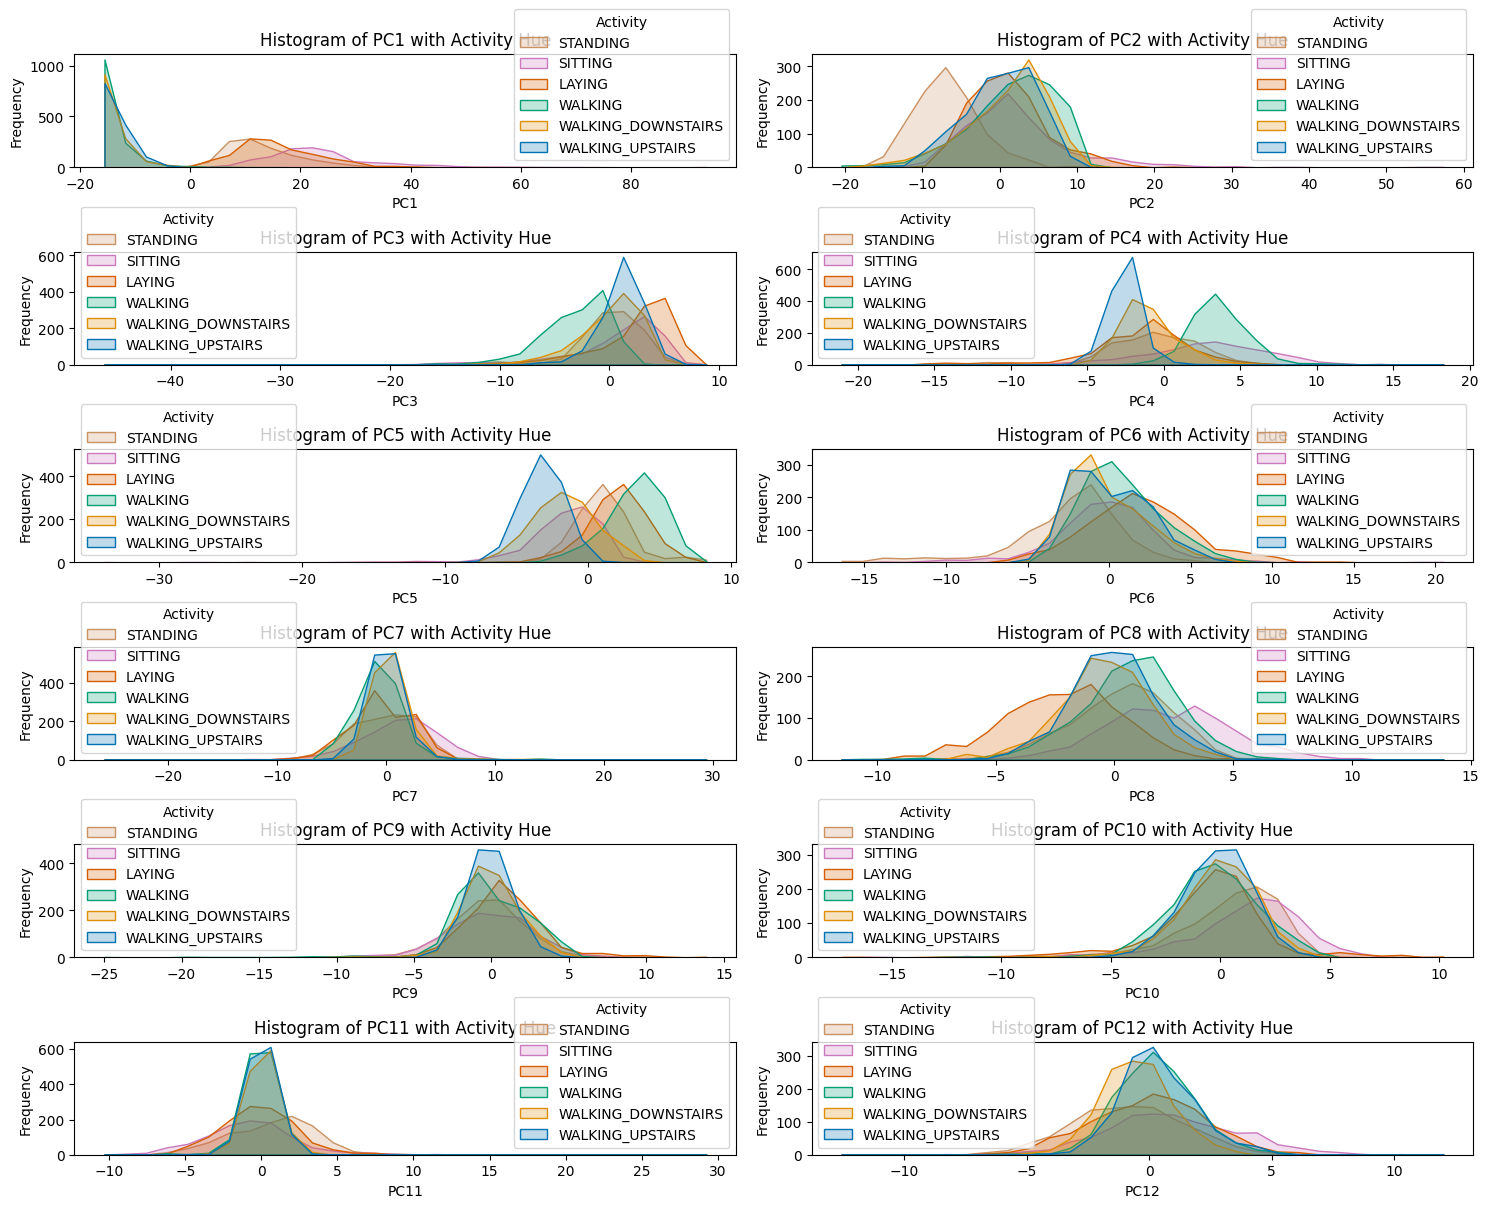

In [161]:


# Create a long-form DataFrame for each principal component and Activity
pc_columns = principal_df.columns[:12]  # Assuming PC1 to PC5 are the first 5 columns

# Set up the figure
plt.figure(figsize=(15, 12))

# Loop through each principal component (PC1 to PC5)
for i, pc in enumerate(pc_columns):
    plt.subplot(6, 2, i + 1)  # Creates a grid of subplots (3 rows and 2 columns)
    
    # Create histogram for each principal component with Activity as hue
    sns.histplot(data=principal_df, x=pc, hue='Activity', bins=30, palette='colorblind', element='poly')

    # Add labels and title
    plt.xlabel(pc)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {pc} with Activity Hue')

    # Explicitly set legend labels
    plt.legend(title='Activity', labels=principal_df['Activity'].unique())

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



- **PC4**:  
  - **Distinguishes**: **Standing vs. Sitting** and **Walking vs. Walking Upstairs**.  
  - The distribution for these activities shows clear separation, forming well-shaped curves that are distinct from each other.

- **PC5**:  
  - **Distinguishes**: **Walking vs. Walking Downstairs**.  
  - The data for these activities exhibits clear separation, with well-defined distributions that make it easy to distinguish between the two.

-  **PC8**:
   - **Standing vs. Sitting**:  
   - These two activities are well-separated, with their distributions forming nearly well-shaped curves that are far apart from each other. This indicates that the activities are easily distinguishable.




## Factor Analysis

In [121]:
from sklearn.decomposition import FactorAnalysis
# Initialize FactorAnalysis with the number of components (factors)
fa = FactorAnalysis(n_components=10, random_state=65, rotation='varimax')

# Fit the model and transform the data into the factors
factors = fa.fit_transform(data_scaled)

In [122]:
# Get the factor loadings
loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor{i+1}' for i in range(fa.n_components)], index=data.columns[:-2])

In [123]:
loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10
tBodyAcc-mean()-X,0.007025,-0.032417,-0.011906,0.044712,-0.004968,-0.024489,0.042906,0.023489,-0.015034,-0.198662
tBodyAcc-mean()-Y,-0.050032,-0.020413,-0.008035,0.015158,0.034366,-0.036118,-0.001018,0.006507,0.002283,0.031875
tBodyAcc-mean()-Z,-0.028860,0.003712,-0.078546,0.014210,0.014320,-0.028522,-0.045375,-0.011980,-0.020209,0.099795
tBodyAcc-std()-X,0.968811,-0.038074,0.006983,0.206648,-0.035523,-0.043263,0.075299,-0.000011,0.009712,0.056500
tBodyAcc-std()-Y,0.969250,-0.060900,0.010638,-0.068653,-0.046422,0.060051,-0.095317,-0.019109,0.043891,0.132630
...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.013805,0.006757,0.051849,0.023327,0.056727,-0.081759,0.005284,0.030055,-0.019013,-0.028292
"angle(tBodyGyroJerkMean,gravityMean)",-0.024554,0.012106,-0.001732,-0.014148,-0.033317,0.039985,0.017988,-0.013373,0.025868,0.022090
"angle(X,gravityMean)",-0.338326,0.928980,-0.022093,-0.034778,-0.011462,0.019737,-0.003941,-0.029950,0.004225,-0.020743
"angle(Y,gravityMean)",0.464663,-0.678094,-0.003470,-0.037100,-0.041818,0.065739,-0.017158,-0.000463,0.002449,0.098666


In [124]:
# Initialize and fit FactorAnalysis with 10 components
fa = FactorAnalysis(n_components=10, random_state=65, rotation='varimax')
fa.fit(data_scaled)

# Factor loadings
factor_loadings = fa.components_

# comunalities 
variance_explained = np.sum(factor_loadings**2 , axis = 1)

# Percentage of total variance explained by each factor
total_variance_explained = np.sum(variance_explained)

variance_explained_ratio = variance_explained / 561

# Create a DataFrame for clarity
variance_df = pd.DataFrame({
    'Factor': [f'Factor{i+1}' for i in range(len(variance_explained))],
    'Variance Explained': variance_explained,
    'Proportion of Total Variance': variance_explained_ratio
})
# Sort the DataFrame by 'Variance Explained' in descending order
variance_df = variance_df.sort_values(by='Variance Explained', ascending=False).reset_index(drop=True)

# Add cumulative sum column for the proportion of total variance explained
variance_df['Cumulative Variance Explained'] = variance_df['Proportion of Total Variance'].cumsum()

variance_df

,Factor,Variance Explained,Proportion of Total Variance,Cumulative Variance Explained
0,Factor1,275.163784,0.490488,0.490488
1,Factor5,25.301295,0.045100,0.535588
2,Factor10,24.571853,0.043800,0.579388
3,Factor2,12.348020,0.022011,0.601399
4,Factor6,10.888211,0.019409,0.620808
5,Factor4,7.227507,0.012883,0.633691
6,Factor7,6.208775,0.011067,0.644758
7,Factor9,5.421812,0.009665,0.654423
8,Factor8,5.279441,0.009411,0.663834
9,Factor3,5.200182,0.009269,0.673103


## Analysing Factor 1

In [125]:
loadings['Factor1'].describe(percentiles=[.01,.015,.02,.025,.03])

count    561.000000
mean       0.495040
std        0.495844
min       -0.964453
1%        -0.893170
1.5%      -0.864091
2%        -0.803238
2.5%      -0.715536
3%        -0.585854
50%        0.678839
max        0.990180
Name: Factor1, dtype: float64

Smallest 2% of the columns are loading heavily on negaitve sides

In [126]:
loadings['Factor1'].describe(percentiles=[.6,.65,.7,.8,.9])

count    561.000000
mean       0.495040
std        0.495844
min       -0.964453
50%        0.678839
60%        0.799192
65%        0.844417
70%        0.874687
80%        0.921667
90%        0.957351
max        0.990180
Name: Factor1, dtype: float64

Highest 40% of the variables loading heavily on factor 1

(array([ 12.,   7.,  23.,  27.,  53.,  33.,  35.,  46.,  99., 226.]),
 array([-0.964453  , -0.76898975, -0.57352649, -0.37806324, -0.18259998,
         0.01286328,  0.20832653,  0.40378979,  0.59925304,  0.7947163 ,
         0.99017955]),
 <BarContainer object of 10 artists>)

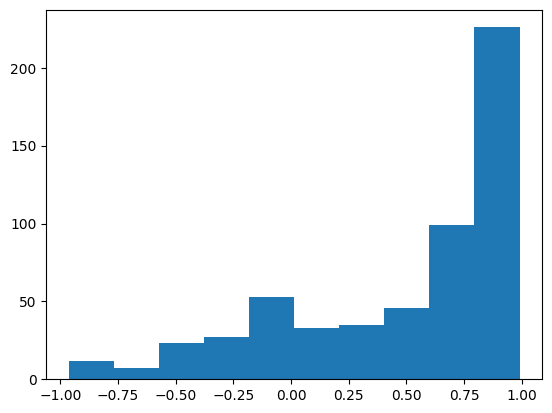

In [127]:
plt.hist(loadings['Factor1'])

In [128]:
col_info.drop(columns='Unnamed: 0' , inplace=True)

#### Positive loading

In [129]:
# Get indexes of elements greater than 0.9
indexes = [index for index, value in enumerate(list(loadings['Factor1'])) if value > 0.9 ]
f1 = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')

In [130]:
f1.columns

Index(['Names', 'Domain', 'Measure', 'Statistic', 'Device', 'Angle',
       'Magnitude', 'Direction'],
      dtype='object')

<Axes: xlabel='Magnitude'>

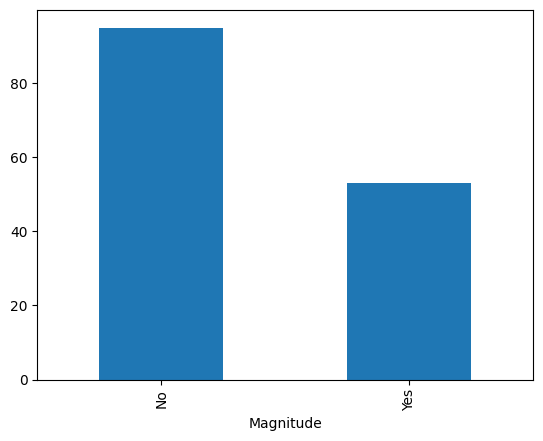

In [131]:
f1['Magnitude'].value_counts().plot(kind='bar')

Factor 1 is capturing majority of variables which are related to direction of motion of the smartphone

<Axes: xlabel='Device'>

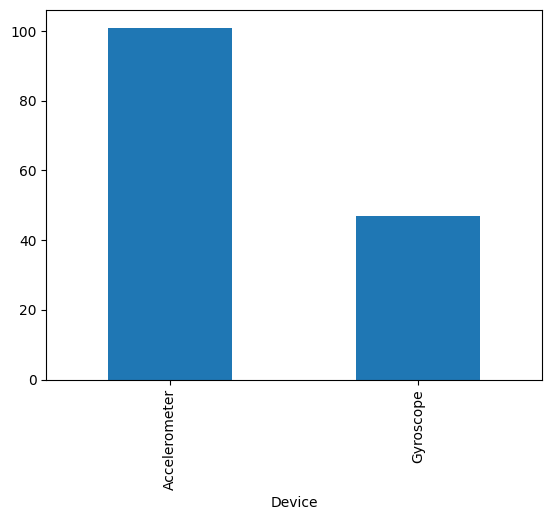

In [132]:
f1['Device'].value_counts().plot(kind='bar')

Factor 1 is takes high loading for the variables which are captured through accelerometer

<Axes: xlabel='Measure'>

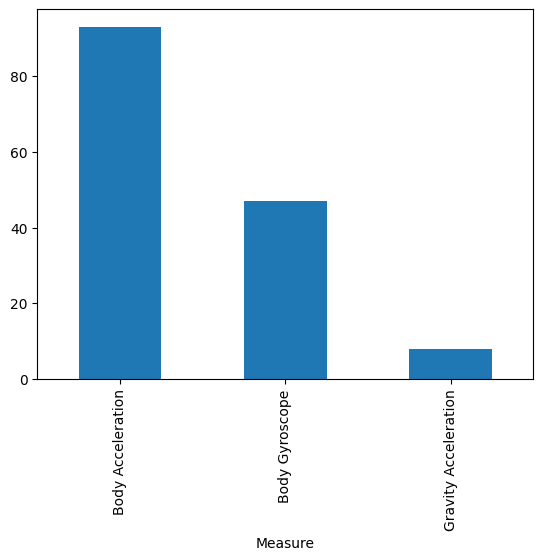

In [133]:
f1['Measure'].value_counts().plot(kind='bar')

It shows that factor1 is loading very high for most of the body acceleration variables

#### Negative loadings

In [134]:
# Get indexes of elements less than -0.7
indexes = [index for index, value in enumerate(list(loadings['Factor1'])) if value < -0.7 ]
f1_neg = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')

In [135]:
f1_neg

,Names,Domain,Measure,Statistic,Device,Angle,Magnitude,Direction
0,tBodyAcc-min()-X,Time,Body Acceleration,Minimum,Accelerometer,No,No,X
1,tBodyAcc-min()-Y,Time,Body Acceleration,Minimum,Accelerometer,No,No,Y
2,tBodyAcc-min()-Z,Time,Body Acceleration,Minimum,Accelerometer,No,No,Z
3,"tBodyAcc-arCoeff()-X,1",Time,Body Acceleration,Autoregression Coefficient,Accelerometer,No,No,X
4,tBodyAccJerk-min()-X,Time,Body Acceleration,Minimum,Accelerometer,No,No,X
5,tBodyAccJerk-min()-Y,Time,Body Acceleration,Minimum,Accelerometer,No,No,Y
6,tBodyAccJerk-min()-Z,Time,Body Acceleration,Minimum,Accelerometer,No,No,Z
7,"tBodyAccJerk-arCoeff()-X,1",Time,Body Acceleration,Autoregression Coefficient,Accelerometer,No,No,X
8,tBodyGyro-min()-X,Time,Body Gyroscope,Minimum,Gyroscope,No,No,X
9,tBodyGyro-min()-Y,Time,Body Gyroscope,Minimum,Gyroscope,No,No,Y


<Axes: xlabel='Direction'>

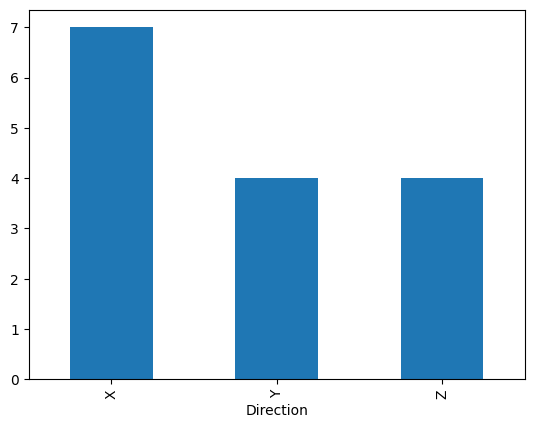

In [136]:
f1_neg['Direction'].value_counts().plot(kind='bar')

<Axes: xlabel='Statistic'>

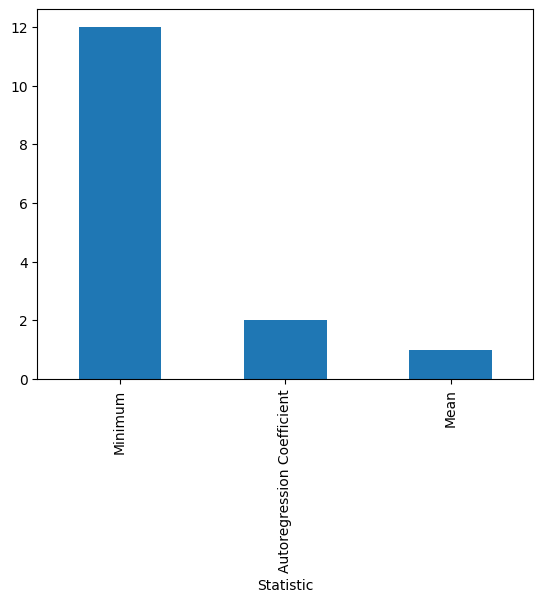

In [137]:
f1_neg['Statistic'].value_counts().plot(kind='bar')

<Axes: xlabel='Domain'>

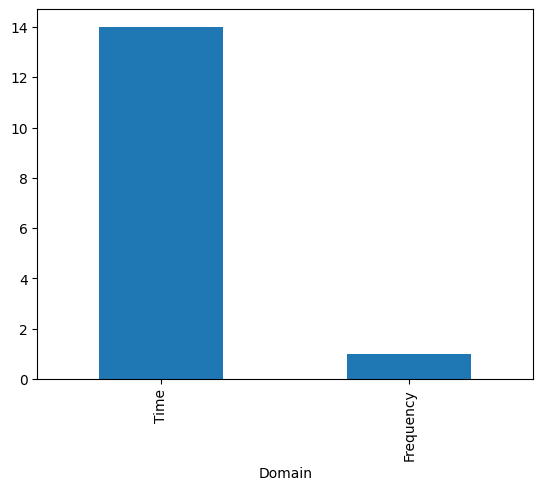

In [138]:
f1_neg['Domain'].value_counts().plot(kind='bar')

Factor 1 is highly negatively loaded for time domain acceleration variables along with their directions 

 
- Factor 1 captures the motion data for which it highly relies on **Accelerometer** along with **direction** of motion of smartphone.

## Factor 4

In [139]:
variance_df

,Factor,Variance Explained,Proportion of Total Variance,Cumulative Variance Explained
0,Factor1,275.163784,0.490488,0.490488
1,Factor5,25.301295,0.045100,0.535588
2,Factor10,24.571853,0.043800,0.579388
3,Factor2,12.348020,0.022011,0.601399
4,Factor6,10.888211,0.019409,0.620808
5,Factor4,7.227507,0.012883,0.633691
6,Factor7,6.208775,0.011067,0.644758
7,Factor9,5.421812,0.009665,0.654423
8,Factor8,5.279441,0.009411,0.663834
9,Factor3,5.200182,0.009269,0.673103


In [140]:
loadings['Factor5'].describe(percentiles=[.96,.95,.98,.985,.99,.995])

count    561.000000
mean       0.105766
std        0.184321
min       -0.475443
50%        0.066512
95%        0.522162
96%        0.546921
98%        0.622466
98.5%      0.631889
99%        0.649067
99.5%      0.707211
max        0.741800
Name: Factor5, dtype: float64

In [141]:
# Get indexes of elements greater than 0.6
indexes = [index for index, value in enumerate(list(loadings['Factor5'])) if abs(value) > 0.6 ]
f5 = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')
f5

,Names,Domain,Measure,Statistic,Device,Angle,Magnitude,Direction
0,tBodyAccJerk-energy()-Z,Time,Body Acceleration,Energy,Accelerometer,No,No,Z
1,tBodyGyroJerk-energy()-Y,Time,Body Gyroscope,Energy,Gyroscope,No,No,Y
2,tBodyGyroJerkMag-energy(),Time,Body Gyroscope,Energy,Gyroscope,No,Yes,NaN
3,"fBodyAcc-bandsEnergy()-17,24.2",Frequency,Body Acceleration,Band Energy,Accelerometer,No,No,NaN
4,"fBodyAcc-bandsEnergy()-17,32.2",Frequency,Body Acceleration,Band Energy,Accelerometer,No,No,NaN
5,fBodyAccJerk-energy()-Z,Frequency,Body Acceleration,Energy,Accelerometer,No,No,Z
6,"fBodyAccJerk-bandsEnergy()-17,24.2",Frequency,Body Acceleration,Band Energy,Accelerometer,No,No,NaN
7,"fBodyAccJerk-bandsEnergy()-17,32.2",Frequency,Body Acceleration,Band Energy,Accelerometer,No,No,NaN
8,"fBodyAccJerk-bandsEnergy()-1,24.2",Frequency,Body Acceleration,Band Energy,Accelerometer,No,No,NaN
9,"fBodyGyro-bandsEnergy()-9,16.1",Frequency,Body Gyroscope,Band Energy,Gyroscope,No,No,NaN


- Factor 5 is heavily loaded with frequency domain data where it captures the magnitude of energy data mainly

## Factor 3

In [142]:
# Get indexes of elements greater than 0.6
indexes = [index for index, value in enumerate(list(loadings['Factor10'])) if abs(value) > 0.65 ]
f10 = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')
f10

,Names,Domain,Measure,Statistic,Device,Angle,Magnitude,Direction
0,tGravityAcc-std()-Y,Time,Gravity Acceleration,Standard Deviation,Accelerometer,No,No,Y
1,tGravityAcc-std()-Z,Time,Gravity Acceleration,Standard Deviation,Accelerometer,No,No,Z
2,tGravityAcc-mad()-Y,Time,Gravity Acceleration,Median Absolute Deviation,Accelerometer,No,No,Y
3,tGravityAcc-mad()-Z,Time,Gravity Acceleration,Median Absolute Deviation,Accelerometer,No,No,Z
4,tGravityAcc-iqr()-Z,Time,Gravity Acceleration,Inter Quartile Range,Accelerometer,No,No,Z
5,"tGravityAcc-arCoeff()-Y,1",Time,Gravity Acceleration,Autoregression Coefficient,Accelerometer,No,No,Y
6,"tGravityAcc-arCoeff()-Y,2",Time,Gravity Acceleration,Autoregression Coefficient,Accelerometer,No,No,Y
7,"tGravityAcc-arCoeff()-Y,3",Time,Gravity Acceleration,Autoregression Coefficient,Accelerometer,No,No,Y
8,"tGravityAcc-arCoeff()-Z,1",Time,Gravity Acceleration,Autoregression Coefficient,Accelerometer,No,No,Z
9,"tGravityAcc-arCoeff()-Z,2",Time,Gravity Acceleration,Autoregression Coefficient,Accelerometer,No,No,Z



 - Factor 10 is capturing the information about autoregression coefficient of gravitational acceleration experienced by body through variables of time domain  

## Factor 2

In [143]:
loadings['Factor2'].describe(percentiles=[i for i in np.arange(0,0.01,0.001)])

count    561.000000
mean      -0.009226
std        0.148205
min       -0.939868
0%        -0.939868
0.1%      -0.937801
0.2%      -0.935240
0.3%      -0.930868
0.4%      -0.925862
0.5%      -0.920013
0.6%      -0.831585
0.7%      -0.697280
0.8%      -0.623805
0.9%      -0.560196
50%       -0.020413
max        0.928980
Name: Factor2, dtype: float64

##### Negative Loadings

In [144]:
# Get indexes of elements less than -0.7
indexes = [index for index, value in enumerate(list(loadings['Factor2'])) if (value) < -0.7 ]
f2_neg = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')
f2_neg

,Names,Domain,Measure,Statistic,Device,Angle,Magnitude,Direction
0,tGravityAcc-mean()-X,Time,Gravity Acceleration,Mean,Accelerometer,No,No,X
1,tGravityAcc-max()-X,Time,Gravity Acceleration,Maximum,Accelerometer,No,No,X
2,tGravityAcc-min()-X,Time,Gravity Acceleration,Minimum,Accelerometer,No,No,X
3,tGravityAcc-energy()-X,Time,Gravity Acceleration,Energy,Accelerometer,No,No,X


#### Positive Loadings

In [145]:
# Get indexes of elements more than 0.7
indexes = [index for index, value in enumerate(list(loadings['Factor2'])) if (value) > 0.7 ]
f2_pos = pd.merge(pd.DataFrame(data = data.columns[indexes], columns= ['Names']) , col_info , how= 'inner')
f2_pos

,Names,Domain,Measure,Statistic,Device,Angle,Magnitude,Direction
0,tGravityAcc-energy()-Y,Time,Gravity Acceleration,Energy,Accelerometer,No,No,Y
1,tGravityAcc-energy()-Z,Time,Gravity Acceleration,Energy,Accelerometer,No,No,Z
2,"angle(X,gravityMean)",Angle,NaN,NaN,NaN,Yes,No,X


- Factor 2 captures Gravitational acceleration information of the body mainly along X axis 

# Clustering

## K-Means

In [ ]:
principal_df1 = principal_df.iloc[:, :]
# principal_df1

In [71]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch

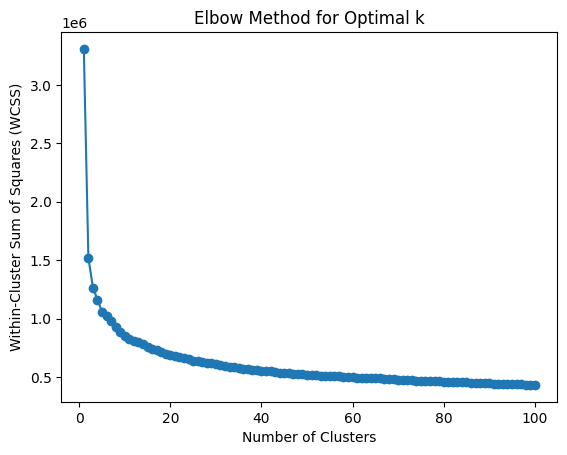

In [72]:
wcss = []
max_k = 100  # Try different values to see the elbow
for k in range(1, max_k+1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(principal_df1)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot WCSS against the number of clusters
plt.plot(range(1, max_k+1), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

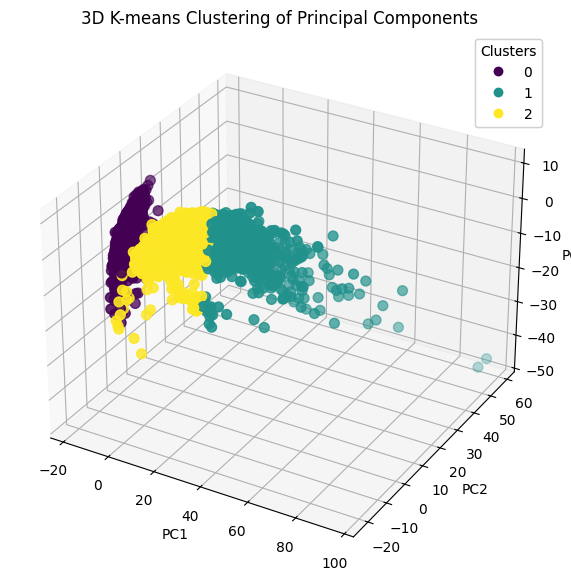

In [73]:
principal_df2 = principal_df.copy()

# Apply K-means clustering on the reduced data
k = 3  # Number of clusters, modify as necessary
kmeans = KMeans(n_clusters=k, random_state=0)
principal_df2['Cluster'] = kmeans.fit_predict(principal_df2)

# 3D Visualization using Matplotlib
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the principal components, coloring by cluster
scatter = ax.scatter(
    principal_df2['PC1'], 
    principal_df2['PC2'], 
    principal_df2['PC3'], 
    c=principal_df2['Cluster'], 
    cmap='viridis', 
    s=50  # Adjust point size
)

# Add labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title("3D K-means Clustering of Principal Components")

# Create a legend
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()

## Hierarchial Clustering

In [215]:
# Remove the last two columns of the DataFrame
principal_df = principal_df1.iloc[:, :]


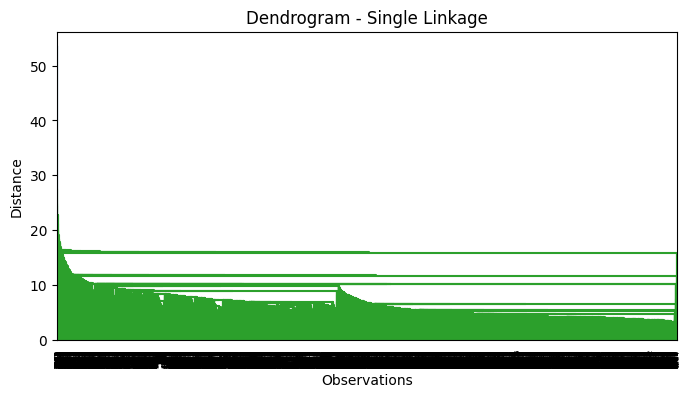

In [216]:
# Single linkage clustering on rows
plt.figure(figsize=(8, 4))
plt.title("Dendrogram - Single Linkage")
single_linkage = sch.linkage(principal_df, method='single', metric='euclidean')
dendrogram_single = sch.dendrogram(single_linkage)
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()


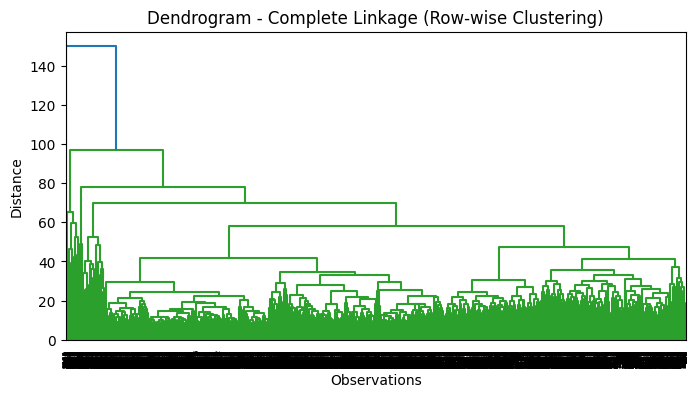

In [217]:
# Complete linkage clustering on rows
plt.figure(figsize=(8, 4))
plt.title("Dendrogram - Complete Linkage")
complete_linkage = sch.linkage(principal_df, method='complete', metric='euclidean')
dendrogram_complete = sch.dendrogram(complete_linkage)
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

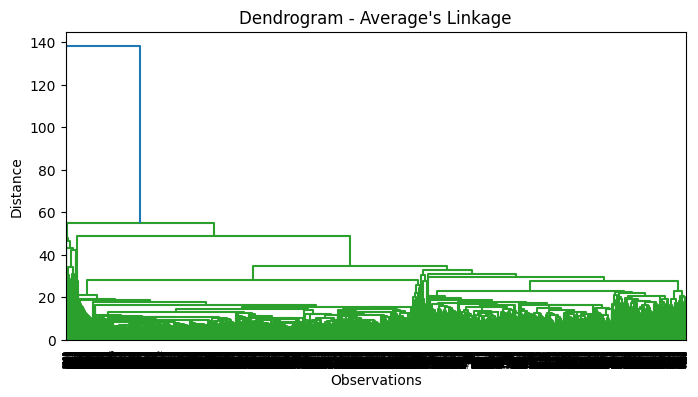

In [218]:
# average linkage clustering on rows (observations)
plt.figure(figsize=(8, 4))
plt.title("Dendrogram - Average's Linkage")
ward_linkage = sch.linkage(principal_df, method='average', metric='euclidean')
dendrogram_ward = sch.dendrogram(ward_linkage)
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

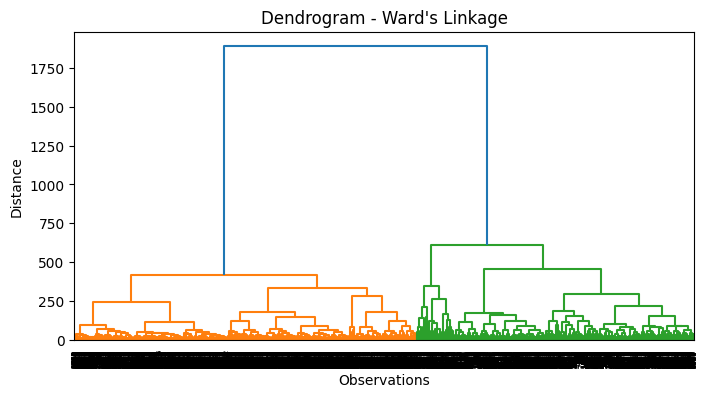

In [219]:
# Ward linkage clustering on rows (observations)
plt.figure(figsize=(8, 4))
plt.title("Dendrogram - Ward's Linkage")
ward_linkage = sch.linkage(principal_df, method='ward', metric='euclidean')
dendrogram_ward = sch.dendrogram(ward_linkage)
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

In [220]:
from scipy.cluster.hierarchy import fcluster

# Cut the dendrogram to form clusters at a given distance threshold
distance_threshold = 750  # Adjust this threshold to get the desired number of clusters
clusters_ward = fcluster(ward_linkage, t=distance_threshold, criterion='distance')
data2 = data.copy()
data2['Cluster'] = clusters_ward

In [221]:
for i in range(data2["Cluster"].max()):
    cluster_from_data = data2.loc[data2[data2['Cluster'] == i+1].index]
    # Display the result
    print(f"Cluster {i+1} from Data DataFrame:")
    print(cluster_from_data["Activity"].value_counts())

    print('-------------------------------------------------------------------------------------------------------------')

Cluster 1 from Data DataFrame:
Activity
LAYING      1407
STANDING    1374
SITTING     1285
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------
Cluster 2 from Data DataFrame:
Activity
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
SITTING                  1
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------



From the initial clustering analysis, we observed the following:

- **First Cluster**: This cluster primarily captures high-motion activities.
- **Second Cluster**: This cluster includes low-motion activities, such as "Standing Still" and "Sitting Alone".

However, using only the Principal Components (PCs) for clustering could not accurately capture smaller activities. Therefore, we will now use the complete dataset for a more detailed clustering analysis to improve the differentiation between activities.




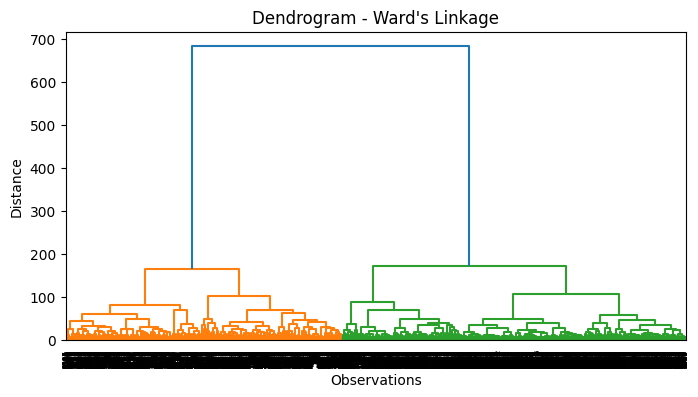

In [225]:
# Ward linkage clustering on rows (observations)
plt.figure(figsize=(8, 4))
plt.title("Dendrogram - Ward's Linkage")
ward_linkage = sch.linkage(data.iloc[:, :-2], method='ward', metric='euclidean')
dendrogram_ward = sch.dendrogram(ward_linkage)
plt.xlabel("Observations")
plt.ylabel("Distance")
plt.show()

### Dendrogram Analysis and Clustering Insights

In our analysis of the dendrogram, we observed the following:

- **Cutting at 250**: When we cut the dendrogram at a threshold of 250, we obtain two primary clusters:
  - **Cluster 1**: High-motion activities
  - **Cluster 2**: Low-motion activities (e.g., Standing still, Sitting alone)

- **Cutting at 150**: Interestingly, cutting the dendrogram at a threshold of 150 reveals an additional, distinct cluster:
  - **Cluster 3**: Activities primarily associated with lying down, forming a clear and separate cluster.

This indicates that, beyond the general motion and non-motion clusters, there is a unique behavior captured for lying down when clustering at a finer level.


In [85]:
# Cut the dendrogram to form clusters at a given distance threshold
distance_threshold = 150  
clusters_ward = fcluster(ward_linkage, t=distance_threshold, criterion='distance')

# Add the cluster labels to your DataFrame (excluding the activity column for clustering)
data2['Cluster'] = clusters_ward

In [86]:
for i in range(data2["Cluster"].max()):
    cluster_from_data = data2.loc[data2[data2['Cluster'] == i+1].index]
    # Display the result
    print(f"Cluster {i+1} from Data DataFrame:")
    print(cluster_from_data["Activity"].value_counts())

    print('-------------------------------------------------------------------------------------------------------------')

Cluster 1 from Data DataFrame:
Activity
WALKING_UPSTAIRS      841
WALKING               710
WALKING_DOWNSTAIRS     62
SITTING                 1
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------
Cluster 2 from Data DataFrame:
Activity
WALKING_DOWNSTAIRS    924
WALKING               516
WALKING_UPSTAIRS      232
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------
Cluster 3 from Data DataFrame:
Activity
LAYING     1403
SITTING       8
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------
Cluster 4 from Data DataFrame:
Activity
STANDING    1374
SITTING     1277
LAYING         4
Name: count, dtype: int64
-------------------------------------------------------------------------------------------------------------


***Cluster-3 : Clear seperation for the activity Lying***

## Model Fitting

### Motion Vs non Motion using PC1 model

In [175]:
# Assuming 'Activity' is a column in the original 'data' DataFrame
principal_df['Activity'] = data['Activity']

# Step 1: Preprocess Data
# Create a binary target column where 'WALKING' is 1 and all other activities are 0
principal_df['Activity_binary'] = principal_df['Activity'].apply(lambda x: 1 if x in ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"] else 0)

# Select PC1 as the feature and Activity_binary as the target
X = principal_df[['PC1']]  # Feature (use PC1 instead of PC4 as you have mentioned PC1)
y = principal_df['Activity_binary']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit models
models = {
    'LDA': LDA(),
    'QDA': QDA(),
}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
        'support': 'Support'
    })
    print(report_df)



LDA Performance:
Accuracy: 0.9966

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.995128  0.998778  0.996949
1              0.998462  0.993874  0.996163
accuracy       0.996601  0.996601  0.996601
macro avg      0.996795  0.996326  0.996556
weighted avg   0.996608  0.996601  0.996600

QDA Performance:
Accuracy: 0.9905

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              1.000000  0.982885  0.991369
1              0.979010  1.000000  0.989394
accuracy       0.990483  0.990483  0.990483
macro avg      0.989505  0.991443  0.990381
weighted avg   0.990682  0.990483  0.990492


**- We get accuracy 99.6% with LDA & 99.05% with QDA**


### Standing vs All using PC2 model

In [194]:

# Step 1: Preprocess Data
# Create a binary target column where 'Standing' is 1 and all other activities are 0
principal_df['Activity_binary'] = principal_df['Activity'].apply(lambda x: 1 if x == 'STANDING' else 0)

# Select PC2 as the feature and Activity_binary as the target
X = principal_df[['PC2']]  # Feature
y = principal_df['Activity_binary']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit models
models = {
    'LDA': LDA(),
    'QDA': QDA(),
}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model with `zero_division=1` to handle undefined metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)



LDA Performance:
Accuracy: 0.8124

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.812373  1.000000  0.896474
1              1.000000  0.000000  0.000000
accuracy       0.812373  0.812373  0.812373
macro avg      0.906186  0.500000  0.448237
weighted avg   0.847577  0.812373  0.728271

QDA Performance:
Accuracy: 0.8124

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.812373  1.000000  0.896474
1              1.000000  0.000000  0.000000
accuracy       0.812373  0.812373  0.812373
macro avg      0.906186  0.500000  0.448237
weighted avg   0.847577  0.812373  0.728271


**- We get accuracy 81.24% with LDA & 81.24% with QDA**


### Walking vs All using PC4 model

In [62]:


# Step 1: Preprocess Data
# Create a binary target column where 'WALKING' is 1 and all other activities are 0
principal_df['Activity_binary'] = principal_df['Activity'].apply(lambda x: 1 if x == 'WALKING' else 0)

# Select PC4 as the feature and Activity_binary as the target
X = principal_df[['PC4']]  # Feature
y = principal_df['Activity_binary']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit models
models = {
    'LDA': LDA(),
    'QDA': QDA(),

}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)



LDA Performance:
Accuracy: 0.8307

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.833676  0.995098  0.907263
1              0.400000  0.016194  0.031128
accuracy       0.830727  0.830727  0.830727
macro avg      0.616838  0.505646  0.469195
weighted avg   0.760856  0.830727  0.760148

QDA Performance:
Accuracy: 0.8328

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.835852  0.994281  0.908209
1              0.533333  0.032389  0.061069
accuracy       0.832767  0.832767  0.832767
macro avg      0.684592  0.513335  0.484639
weighted avg   0.785055  0.832767  0.765963


**- We get accuracy 83.07% with LDA & 83.28% with QDA**


### Sitting vs All using PC4 model

In [196]:

# Step 1: Preprocess Data
# Create a binary target column where 'Standing' is 1 and all other activities are 0
principal_df['Activity_binary'] = principal_df['Activity'].apply(lambda x: 1 if x == 'STANDING' else 0)

# Select PC2 as the feature and Activity_binary as the target
X = principal_df[['PC2']]  # Feature
y = principal_df['Activity_binary']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit models
models = {
    'LDA': LDA(),
    'QDA': QDA(),
}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model with `zero_division=1` to handle undefined metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)



LDA Performance:
Accuracy: 0.8124

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.812373  1.000000  0.896474
1              1.000000  0.000000  0.000000
accuracy       0.812373  0.812373  0.812373
macro avg      0.906186  0.500000  0.448237
weighted avg   0.847577  0.812373  0.728271

QDA Performance:
Accuracy: 0.8124

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.812373  1.000000  0.896474
1              1.000000  0.000000  0.000000
accuracy       0.812373  0.812373  0.812373
macro avg      0.906186  0.500000  0.448237
weighted avg   0.847577  0.812373  0.728271


**- We get accuracy 82.19% with LDA & 82.19% with QDA**


### Walking Downstairs vs All using PC5 model

In [173]:
# Step 1: Preprocess Data
# Create a binary target column where 'WALKING' is 1 and all other activities are 0
principal_df['Activity_binary'] = principal_df['Activity'].apply(lambda x: 1 if x == 'WALKING_DOWNSTAIRS' else 0)

# Select PC4 as the feature and Activity_binary as the target
X = principal_df[['PC5']]  # Feature
y = principal_df['Activity_binary']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit models
models = {
    'LDA': LDA(),
    'QDA': QDA(),

}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)



LDA Performance:
Accuracy: 0.8654

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.864662  1.000000  0.927419
1              1.000000  0.038835  0.074766
accuracy       0.865398  0.865398  0.865398
macro avg      0.932331  0.519417  0.501093
weighted avg   0.883615  0.865398  0.808013

QDA Performance:
Accuracy: 0.8606

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.860544  1.000000  0.925046
1              1.000000  0.004854  0.009662
accuracy       0.860639  0.860639  0.860639
macro avg      0.930272  0.502427  0.467354
weighted avg   0.880074  0.860639  0.796855


**- We get accuracy 86.54% with LDA & 86.06% with QDA**


### Sitting vs All using PC8 model

In [198]:


# Step 1: Preprocess Data
# Create a binary target column where 'SITTING' is 1 and all other activities are 0
principal_df['Activity_binary'] = principal_df['Activity'].apply(lambda x: 1 if x == 'SITTING' else 0)

# Select PC8 as the feature and Activity_binary as the target
X = principal_df[['PC8']]  # Feature
y = principal_df['Activity_binary']  # Target

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Fit models
models = {
    'LDA': LDA(),
    'QDA': QDA(),
}

# Step 3: Train and evaluate models
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model with zero_division=1 to avoid warnings
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # Focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)



LDA Performance:
Accuracy: 0.8219

Classification Report (Formatted):
              Precision   Recall  F1-Score
0              0.821890  1.00000  0.902239
1              1.000000  0.00000  0.000000
accuracy       0.821890  0.82189  0.821890
macro avg      0.910945  0.50000  0.451119
weighted avg   0.853613  0.82189  0.741541

QDA Performance:
Accuracy: 0.8219

Classification Report (Formatted):
              Precision   Recall  F1-Score
0              0.821890  1.00000  0.902239
1              1.000000  0.00000  0.000000
accuracy       0.821890  0.82189  0.821890
macro avg      0.910945  0.50000  0.451119
weighted avg   0.853613  0.82189  0.741541


**- We get accuracy 82.19% with LDA & 82.19% with QDA**



### Model Performance with Top 26 Principal Components:

In [166]:
# Step 1: Preprocess Data
# Use Label Encoding to encode 'Activity' column into integers
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Activity' column into integer labels
principal_df['Activity_encoded'] = label_encoder.fit_transform(principal_df['Activity'])

# Step 2: Select the first 26 principal components as features
X = principal_df[['PC' + str(i) for i in range(1, 27)]]  # Features (first 26 PCs)

# For multiclass classification, use the encoded 'Activity' as the target variable
y = principal_df['Activity_encoded']  # Multiclass target variable (encoded)

# Step 3: Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Fit models (LDA and QDA for multiclass classification)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

models = {
    'LDA': LDA(),
    'QDA': QDA(),
}

# Step 5: Train and evaluate models
from sklearn.metrics import accuracy_score, classification_report

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Step 6: Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)



LDA Performance:
Accuracy: 0.8892

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.975177  0.982143  0.978648
1              0.932990  0.690840  0.793860
2              0.769679  0.956522  0.852989
3              0.905882  0.935223  0.920319
4              0.966480  0.839806  0.898701
5              0.844037  0.920000  0.880383
accuracy       0.889191  0.889191  0.889191
macro avg      0.899041  0.887422  0.887483
weighted avg   0.898423  0.889191  0.887808

QDA Performance:
Accuracy: 0.9089

Classification Report (Formatted):
              Precision    Recall  F1-Score
0              0.996377  0.982143  0.989209
1              0.918660  0.732824  0.815287
2              0.790909  0.945652  0.861386
3              0.978723  0.931174  0.954357
4              0.926829  0.922330  0.924574
5              0.875000  0.945000  0.908654
accuracy       0.908906  0.908906  0.908906
macro avg      0.914416  0.909854  0.908911
weighted avg   0.91477


- **Quadratic Discriminant Analysis (QDA)**: 91% accuracy
- **Linear Discriminant Analysis (LDA)**: 89% accuracy

T

### Model Performance with Full Dataset:

In [201]:
# Step 1: Preprocess Data
# Use Label Encoding to encode 'Activity' column into integers
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'Activity' column into integer labels
# principal_df['Activity_encoded'] = label_encoder.fit_transform(principal_df['Activity'])

# Step 2: Select the first 26 principal components as features
# X = principal_df[['PC' + str(i) for i in range(1, 27)]]  # Features (first 26 PCs)

# For multiclass classification, use the encoded 'Activity' as the target variable
y = principal_df['Activity_encoded']  # Multiclass target variable (encoded)

# Step 3: Split the data into training and testing sets (80-20 split)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-2], data.iloc[:,-1], test_size=0.2, random_state=42)

# Step 4: Fit models (LDA and QDA for multiclass classification)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

models = {
    'LDA': LDA(),
    'QDA': QDA(),
}

# Step 5: Train and evaluate models
from sklearn.metrics import accuracy_score, classification_report

results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Store the results
    results[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': report
    }

# Step 6: Display the results
for model_name, result in results.items():
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print("\nClassification Report (Formatted):")
    
    # Formatting classification report
    report_df = pd.DataFrame(result['Classification Report']).T
    report_df = report_df[['precision', 'recall', 'f1-score']]  # We focus on these key metrics
    report_df = report_df.rename(columns={
        'precision': 'Precision',
        'recall': 'Recall',
        'f1-score': 'F1-Score',
    })
    print(report_df)


C:\Users\Sagar Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\discriminant_analysis.py:947: UserWarning:

Variables are collinear




LDA Performance:
Accuracy: 0.9776

Classification Report (Formatted):
                    Precision    Recall  F1-Score
LAYING               0.996441  1.000000  0.998217
SITTING              0.943182  0.950382  0.946768
STANDING             0.956044  0.945652  0.950820
WALKING              1.000000  0.991903  0.995935
WALKING_DOWNSTAIRS   1.000000  0.985437  0.992665
WALKING_UPSTAIRS     0.975610  1.000000  0.987654
accuracy             0.977566  0.977566  0.977566
macro avg            0.978546  0.978896  0.978677
weighted avg         0.977639  0.977566  0.977564

QDA Performance:
Accuracy: 0.9470

Classification Report (Formatted):
                    Precision    Recall  F1-Score
LAYING               1.000000  0.992857  0.996416
SITTING              0.941176  0.854962  0.896000
STANDING             0.897527  0.920290  0.908766
WALKING              0.971429  0.963563  0.967480
WALKING_DOWNSTAIRS   0.927602  0.995146  0.960187
WALKING_UPSTAIRS     0.941748  0.970000  0.955665
accuracy

- **Linear Discriminant Analysis (LDA)**: 97.76% accuracy
- **Quadratic Discriminant Analysis (QDA)**: 94.70% accuracy

T

# Conclusion



In this analysis of the IoT dataset with 561 features, we followed a structured approach to reduce dimensionality and improve the clarity of clustering results. Here's a summary of the steps and insights:

#### 1. **Dimensionality Reduction (PCA)**
   - To handle the high number of features and reduce redundancy, we applied **Principal Component Analysis (PCA)**.
   - PCA helped us reduce the number of features from **563 to 62**, retaining the most important information while discarding redundant features.

#### 2. **Factor Analysis**
   - **Factor Analysis** to identify latent variables that could explain the correlation between observed features. We have obtained 4 important factors for which loadings were high. 
   - **1st Factor** captures the motion data for which it highly relies on Accelerometer along with direction of motion of smartphone
   - **2nd Factor** is heavily loaded with frequency domain data where it captures mainly the magnitude of energy.
   - **3rd Factor** is capturing the information about autoregression coefficient of gravitational acceleration experienced by body through time domain variables.
   - **4th Factor** captures Gravitational acceleration information of the body mainly along X axis.
   
   
This further aided in simplifying the complexity of the dataset and understanding the relationships between various features.

#### 3. **Clustering with Hierarchical Clustering (Ward Distance)**
   - Finally, we performed **hierarchical clustering** using **Ward's distance**.
   - The hierarchical clustering with Ward's method yielded the most meaningful and distinct clusters, clearly separating activities such as **motion** vs. **non-motion**, **standing**, and **walking**.

#### 4. **Linear and Quadratic Discriminant Analysis (LDA & QDA)**
   - We applied **LDA** and **QDA** on different principal components to assess how well these models could separate activities based on the reduced features.
   - Both models helped in understanding how well the data could be classified into different activity types using the principal components.

### Summary of LDA and Accuracy for Principal Components and Classification Tasks

\[
\begin{array}{|c|c|c|c|}
\hline
\textbf{Principal Component(s)} & \textbf{Classification Task} & \textbf{LDA Accuracy (%)} & \textbf{QDA Accuracy (%)} \\
\hline
\text{PC1} & \text{Motion vs. Non-motion} & 99.60 & 99.05 \\
\hline
\text{PC2} & \text{Standing vs. Non-standing} & 81.24 & 81.24 \\
\hline
\text{PC4} & \text{Walking vs. Non-walking} & 83.07 & 83.28 \\
\hline
\text{PC4} & \text{Sitting vs. Non-sitting} & 82.19 & 82.19 \\
\hline
\text{PC5} & \text{Walking Downstairs vs. Non-walking Downstairs} & 86.56 & 86.06 \\
\hline
\text{PC8} & \text{Sitting vs. Non-sitting} & 82.19 & 82.19 \\
\hline
\text{Top 26 PCs} & \text{Multiclassification (All Classes)} & 88.92 & 90.89 \\
\hline
\text{Full Data} & \text{Multiclassification (All Classes)} & 97.76 & 94.70 \\
\hline
\end{array}
\]






<div style="text-align: center;">--------- The End ---------</div>
